In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional, AveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger,LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [5]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
# mat1=scipy.io.loadcsv('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/sub_wise_process_TT/S1_tr.csv')
# nina_raw_train=mat1['Training_process_data']
# # # nina_raw_valid=mat1['Valid_raw_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# # # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [7]:
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [8]:
# file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
# file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [42]:
# The number of steps within one time segment
TIME_PERIODS = 15
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 9
N_FEATURES = 10

In [43]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'Class_label']


In [44]:
def read_data_Train(file_path_Train):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [45]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [46]:
def read_data_Test(file_path_Test):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [47]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [48]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [49]:
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_process_TT/Train_data.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 4914000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00719,0.00242,0.00493,0.00242,0.00245,0.00241,0.00307,0.01633,0.00241,0.00246,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00948,0.00243,0.00464,0.00242,0.00246,0.00241,0.00316,0.01762,0.00241,0.00247,1.00000
3,0.01051,0.00243,0.00451,0.00242,0.00246,0.00241,0.00321,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01878,0.00242,0.00248,1.00000
5,0.01219,0.00243,0.00427,0.00242,0.00247,0.00241,0.00332,0.01930,0.00242,0.00249,1.00000
6,0.01283,0.00243,0.00416,0.00242,0.00247,0.00241,0.00338,0.01979,0.00242,0.00249,1.00000
7,0.01334,0.00244,0.00406,0.00243,0.00248,0.00242,0.00345,0.02025,0.00242,0.00250,1.00000
8,0.01376,0.00244,0.00396,0.00243,0.00248,0.00242,0.00351,0.02071,0.00242,0.00251,1.00000
9,0.01409,0.00244,0.00388,0.00243,0.00249,0.00242,0.00359,0.02116,0.00242,0.00251,1.00000


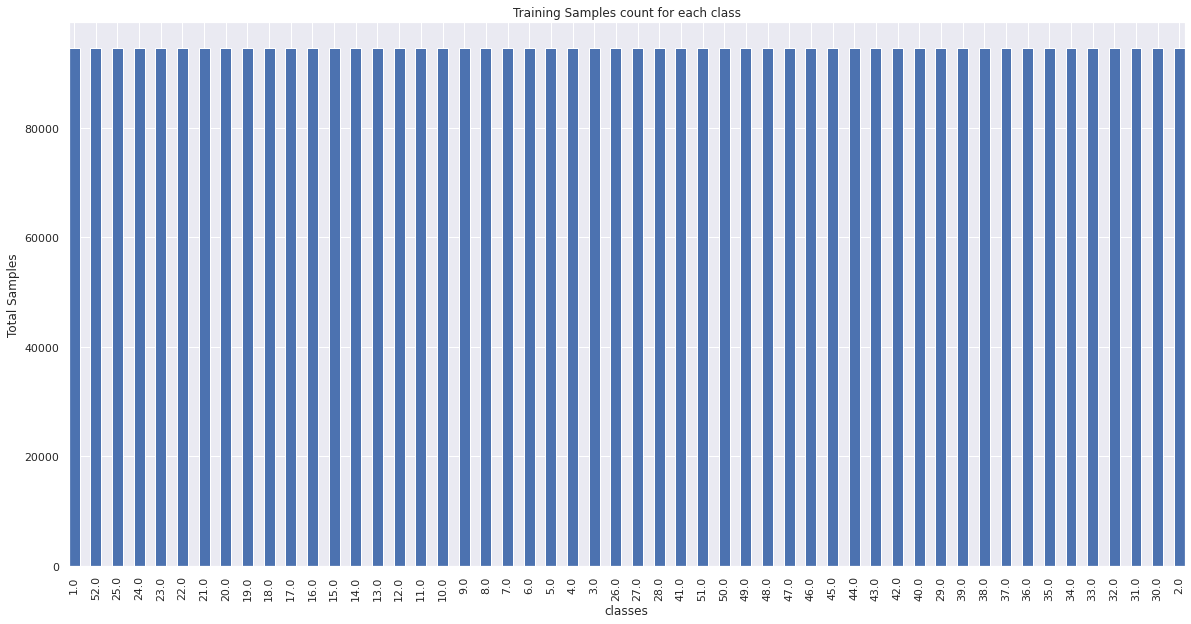

In [50]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [51]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_process_TT/Test_data.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2106000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03174,0.00247,0.00243,0.00240,0.00244,0.00240,0.00256,0.03562,0.00243,0.00241,1.00000
1,0.03204,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03233,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03570,0.00244,0.00241,1.00000
3,0.03259,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03567,0.00244,0.00241,1.00000
5,0.03312,0.00250,0.00246,0.00240,0.00247,0.00240,0.00263,0.03561,0.00245,0.00241,1.00000
6,0.03342,0.00250,0.00246,0.00240,0.00247,0.00240,0.00264,0.03554,0.00245,0.00241,1.00000
7,0.03372,0.00251,0.00246,0.00240,0.00247,0.00240,0.00266,0.03545,0.00245,0.00241,1.00000
8,0.03403,0.00252,0.00247,0.00240,0.00248,0.00240,0.00267,0.03536,0.00246,0.00241,1.00000
9,0.03431,0.00252,0.00247,0.00240,0.00248,0.00240,0.00269,0.03526,0.00246,0.00241,1.00000


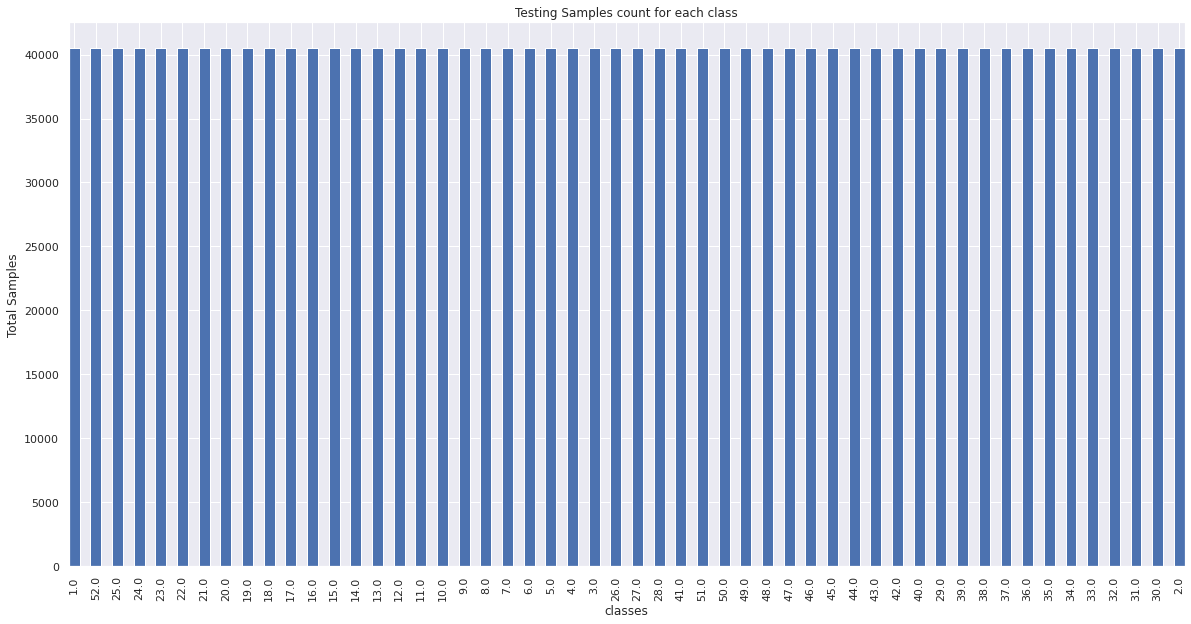

In [52]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [53]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00719,0.00242,0.00493,0.00242,0.00245,0.00241,0.00307,0.01633,0.00241,0.00246,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00948,0.00243,0.00464,0.00242,0.00246,0.00241,0.00316,0.01762,0.00241,0.00247,1.00000
3,0.01051,0.00243,0.00451,0.00242,0.00246,0.00241,0.00321,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01878,0.00242,0.00248,1.00000


In [54]:
# scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [55]:
# df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [56]:
# pd.options.display.float_format = "{:,.5f}".format
# df_Train.head(5)

In [57]:
# pd.options.display.float_format = "{:,.5f}".format
# df_Test.head(5)

In [58]:
# df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [59]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03174,0.00247,0.00243,0.00240,0.00244,0.00240,0.00256,0.03562,0.00243,0.00241,1.00000
1,0.03204,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03233,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03570,0.00244,0.00241,1.00000
3,0.03259,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03567,0.00244,0.00241,1.00000


In [60]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size              C1      C2      C3      C4      C5      C6      C7      C8  \
0       0.00719 0.00242 0.00493 0.00242 0.00245 0.00241 0.00307 0.01633   
1       0.00836 0.00243 0.00478 0.00242 0.00245 0.00241 0.00312 0.01699   
2       0.00948 0.00243 0.00464 0.00242 0.00246 0.00241 0.00316 0.01762   
3       0.01051 0.00243 0.00451 0.00242 0.00246 0.00241 0.00321 0.01822   
4       0.01142 0.00243 0.00439 0.00242 0.00246 0.00241 0.00327 0.01878   
...         ...     ...     ...     ...     ...     ...     ...     ...   
4913995 0.13322 0.03862 0.00686 0.01103 0.00251 0.06917 0.22373 0.27843   
4913996 0.13359 0.03828 0.00675 0.01082 0.00251 0.06874 0.22055 0.27617   
4913997 0.13401 0.03799 0.00666 0.01065 0.00251 0.06839 0.21776 0.27430   
4913998 0.13445 0.03776 0.00659 0.01051 0.00251 0.06810 0.21539 0.27280   
4913999 0.13489 0.03757 0.00653 0.01040 0.00251 0.06788 0.21348 0.27163   

             C9     C10  Class_label  ActivityEncoded  
0       0.00241 0.00246      

In [61]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [62]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (545999, 15, 10)
545999 training samples
y_train shape:  (545999,)
15
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (15, 10)
input_shape: (15, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (545999, 52)


In [63]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (233999, 15, 10)
233999 testing samples
y_test shape:  (233999,)


In [64]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 15, 10
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (545999, 15, 10, 1)
x_test shape:  (233999, 15, 10, 1)
n_outputs 52


In [72]:
verbose, epochs, batch_size = 0, 500, 256

In [73]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1,10), padding='same', kernel_regularizer=l2(5e-04),kernel_initializer="glorot_normal",strides=(1,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3,3),padding="same", kernel_regularizer=l2(5e-04),kernel_initializer="glorot_normal",strides=(1,1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(AveragePooling2D(pool_size=(3, 3),strides=(3,3), padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(5,5),padding="same", kernel_regularizer=l2(5e-04),kernel_initializer="glorot_normal",strides=(1,1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(AveragePooling2D(pool_size=(3, 3),strides=(3,3), padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same", kernel_regularizer=l2(5e-04),kernel_initializer="glorot_normal",strides=(1,1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))

In [74]:
# def step_decay(epoch):
#    initial_lrate = 0.1
#    drop = 0.1
#    epochs_drop = 32.0
#    lrate = initial_lrate * tf.math.pow(drop,  
#            tf.math.floor((1+epoch)/epochs_drop))
#    return lrate

In [75]:
# lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [76]:
# adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 15, 10, 32)        352       
_________________________________________________________________
activation_8 (Activation)    (None, 15, 10, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 10, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 10, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 15, 10, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 10, 32)        0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 3, 32)         

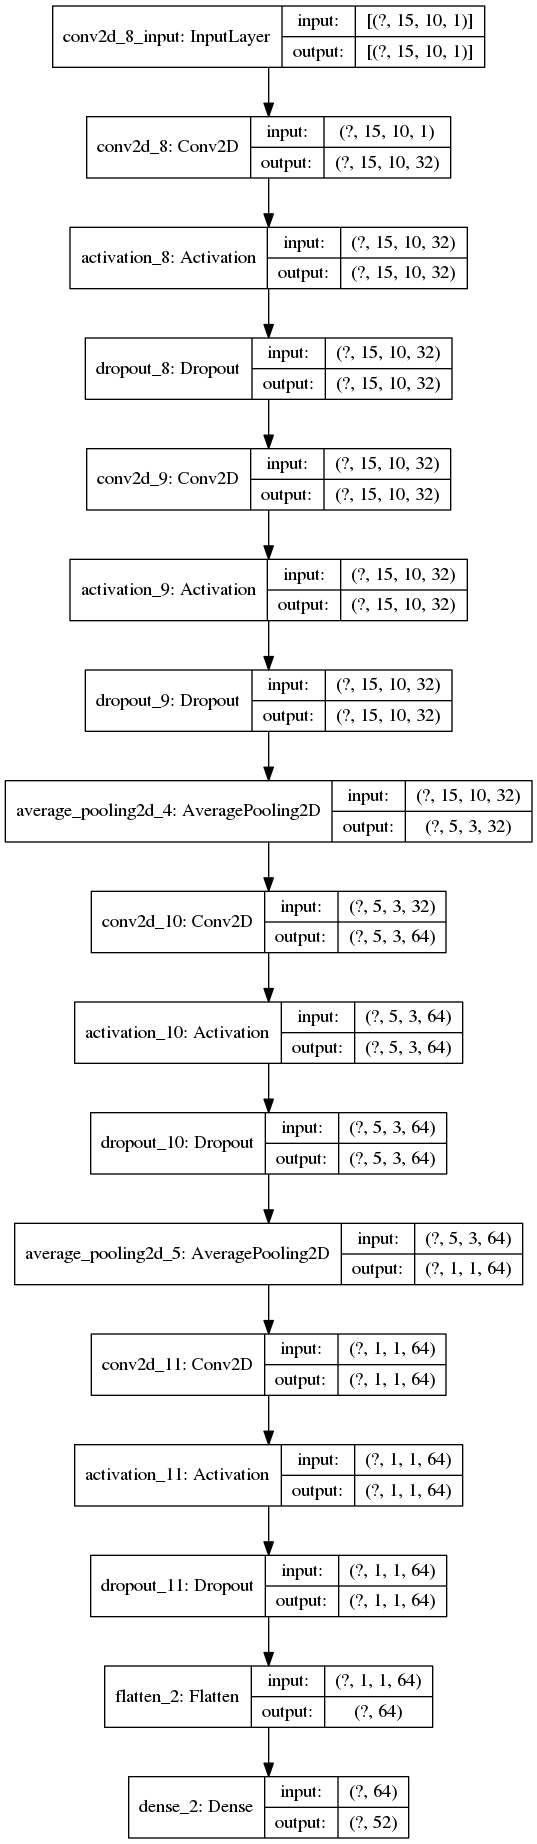

In [77]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [78]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
2133/2133 [==============================] - ETA: 0s - loss: 3.9825 - accuracy: 0.0269
Epoch 00001: val_accuracy improved from -inf to 0.04304, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/checkpoint.hdf5
2133/2133 [==============================] - 71s 33ms/step - loss: 3.9825 - accuracy: 0.0269 - val_loss: 3.9063 - val_accuracy: 0.0430
Epoch 2/500
2128/2133 [============================>.] - ETA: 0s - loss: 3.8872 - accuracy: 0.0444
Epoch 00002: val_accuracy improved from 0.04304 to 0.06121, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/checkpoint.hdf5
2133/2133 [==============================] - 19s 9ms/step - loss: 3.8871 - accuracy: 0.0444 - val_loss: 3.8086 - val_accuracy: 0.0612
Epoch 3/500
2130/2133 [============================>.] - ETA: 0s - loss: 3.7941 - accuracy: 0.0622
Epoch 00003: val_accuracy improved from 0.06121 to 0.08850, saving 

Epoch 22/500
2133/2133 [==============================] - ETA: 0s - loss: 3.5259 - accuracy: 0.1130
Epoch 00022: val_accuracy did not improve from 0.15636
2133/2133 [==============================] - 20s 9ms/step - loss: 3.5259 - accuracy: 0.1130 - val_loss: 3.3440 - val_accuracy: 0.1540
Epoch 23/500
2133/2133 [==============================] - ETA: 0s - loss: 3.5226 - accuracy: 0.1142
Epoch 00023: val_accuracy did not improve from 0.15636
2133/2133 [==============================] - 19s 9ms/step - loss: 3.5226 - accuracy: 0.1142 - val_loss: 3.3615 - val_accuracy: 0.1527
Epoch 24/500
2131/2133 [============================>.] - ETA: 0s - loss: 3.5211 - accuracy: 0.1151
Epoch 00024: val_accuracy did not improve from 0.15636
2133/2133 [==============================] - 19s 9ms/step - loss: 3.5211 - accuracy: 0.1151 - val_loss: 3.3535 - val_accuracy: 0.1554
Epoch 25/500
2129/2133 [============================>.] - ETA: 0s - loss: 3.5186 - accuracy: 0.1154
Epoch 00025: val_accuracy did not

2126/2133 [============================>.] - ETA: 0s - loss: 3.4927 - accuracy: 0.1211
Epoch 00046: val_accuracy did not improve from 0.16527
2133/2133 [==============================] - 22s 10ms/step - loss: 3.4928 - accuracy: 0.1211 - val_loss: 3.3077 - val_accuracy: 0.1646
Epoch 47/500
2132/2133 [============================>.] - ETA: 0s - loss: 3.4921 - accuracy: 0.1210
Epoch 00047: val_accuracy improved from 0.16527 to 0.16580, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/checkpoint.hdf5
2133/2133 [==============================] - 20s 9ms/step - loss: 3.4921 - accuracy: 0.1209 - val_loss: 3.2900 - val_accuracy: 0.1658
Epoch 48/500
2130/2133 [============================>.] - ETA: 0s - loss: 3.4925 - accuracy: 0.1205
Epoch 00048: val_accuracy did not improve from 0.16580
2133/2133 [==============================] - 22s 10ms/step - loss: 3.4926 - accuracy: 0.1205 - val_loss: 3.2950 - val_accuracy: 0.1647
Epoch 49/500
2

KeyboardInterrupt: 

In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

In [ ]:
model.save('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/atzori1X10/CNN_LSTM_nina_5X97')

In [ ]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))